In [38]:
# funcion que nos lea algun campo del fichero wave

import struct as st
import numpy as np

In [51]:
def leeWave(fileWave):
    # leemos el fichero en binario (read binary rb)
    with open(fileWave, 'rb') as fpWave:
        formato = '<4sI4s'
        datos = fpWave.read(st.calcsize(formato))
        chunkID, chunkSize, format = st.unpack(formato, datos)
        if chunkID != b'RIFF' or format != b'WAVE':
            raise Exception(f'El fichero  {fileWave} no tiene formato WAVE')
        fpWave.seek(36, 0)
        formato = '<4sI'
        datos = fpWave.read(st.calcsize(formato))
        Subchunk2ID, Subchunk2Size = st.unpack(formato, datos)
        numMuestras = Subchunk2Size // 2
        formato = f'<{numMuestras}h'
        datos = fpWave.read(st.calcsize(formato))
        muestras = st.unpack(formato, datos)
    return np.array(muestras)


In [52]:
leeWave('apuntes07.05.ipynb') # no tiene formato RIFF (poniendo: formato = <4s)

Exception: El fichero  apuntes07.05.ipynb no tiene formato WAVE

In [53]:
algo = leeWave('luzbel44.wav') # poniendo: fomato = <4sI4s

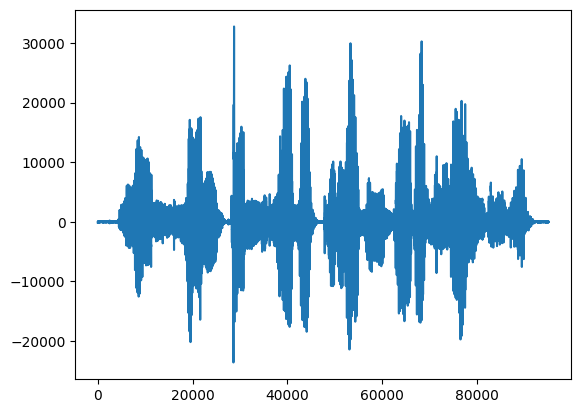

In [54]:
import matplotlib.pyplot as plt
plt.plot(algo)